# 1. Setup and Import Libraries

Start by importing all necessary libraries.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
from sklearn.decomposition import PCA
import joblib

# 2. Load the Dataset

Load the dataset into a Pandas DataFrame.

Provide an overview of the data.

In [2]:
# Load the dataset
df = pd.read_csv('data.csv')

# 3. Exploratory Data Analysis (EDA)
a. Understand the Data
- Use .info() and .describe() to get basic insights.

In [3]:
# Display initial information
df.head()
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave_points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


b. Handle Missing Values

In [4]:
#Drop unnecessary columns (e.g., 'id', 'Unnamed: 32' if present)
df.drop(['id', 'Unnamed: 32'], axis=1, inplace=True, errors='ignore')

c. Check for missing values

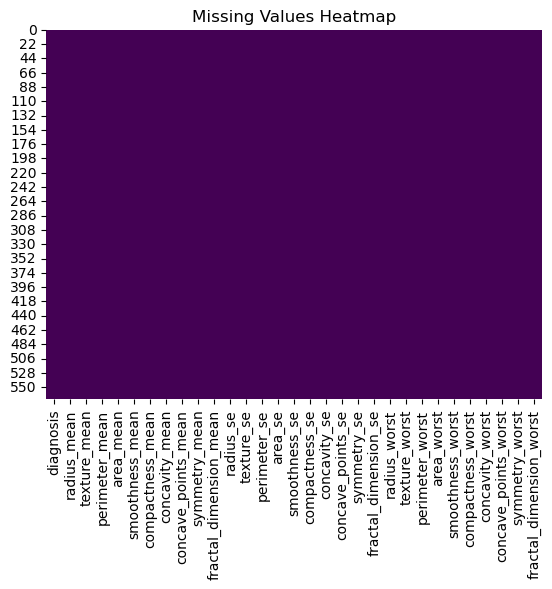

In [5]:
df.isnull().sum()
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

d. Target Variable Distribution
- Plot the distribution of the target variable.

/tmp/ipykernel_21149/2830735948.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='diagnosis', data=df, palette='viridis')


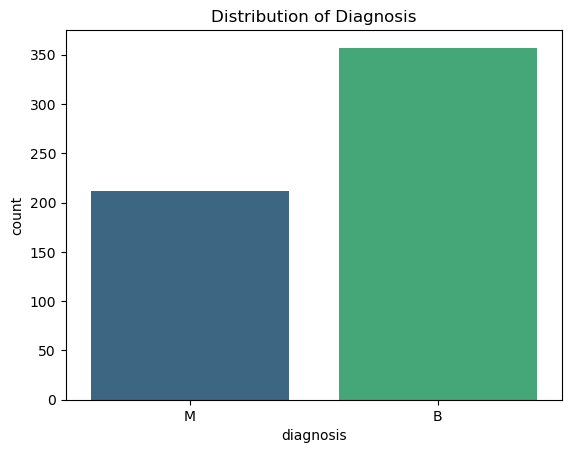

In [6]:
sns.countplot(x='diagnosis', data=df, palette='viridis')
plt.title('Distribution of Diagnosis')
plt.show()

d. Feature Analysis
- Analyze correlations between features.

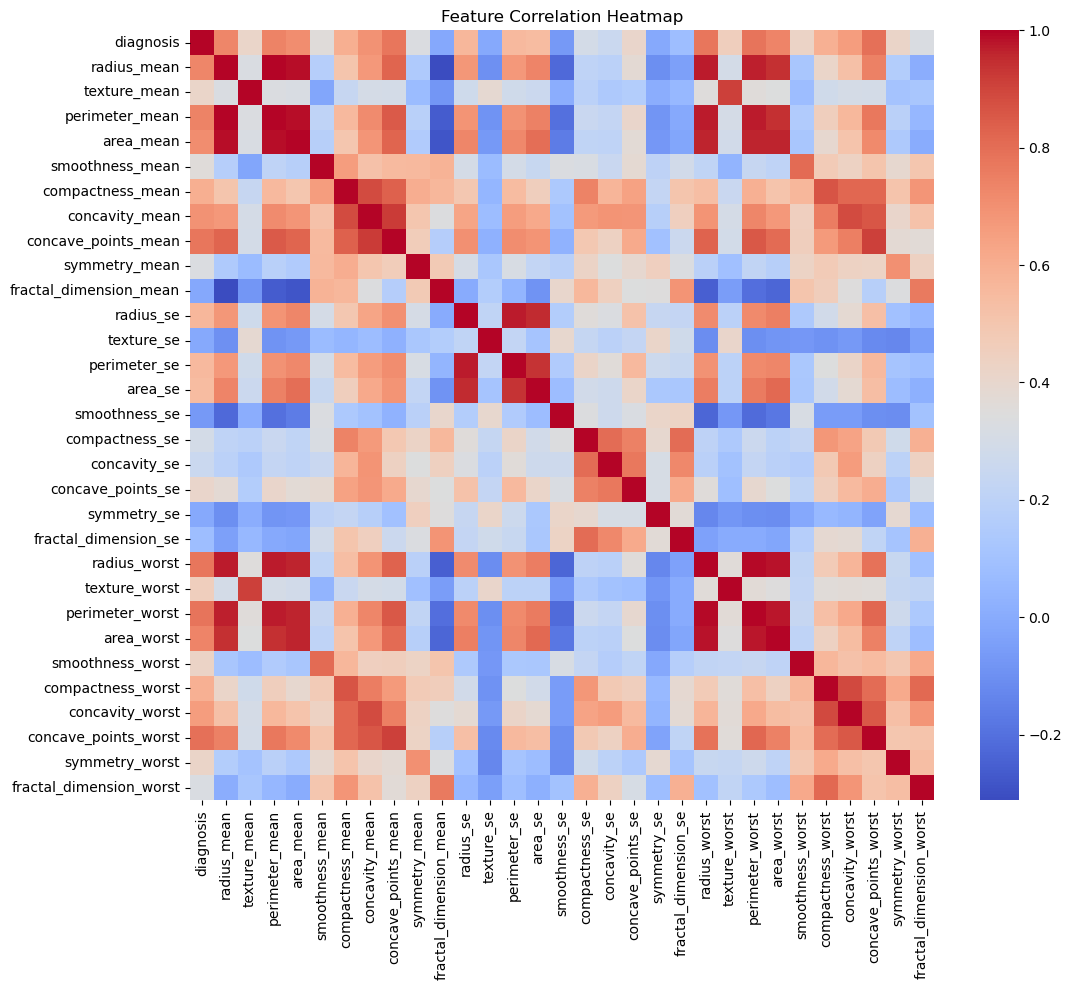

In [7]:
# Convert Categorical Data: Convert the target variable into numerical format.
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})


# Compute correlation matrix
corr_matrix = df.corr()

# Create an interactive heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

e. Pairplots/Boxplots
- Visualize relationships between features and the target variable.

In [10]:
fig = px.scatter_matrix(df, dimensions=['radius_mean', 'texture_mean', 'perimeter_mean'],
                        color='diagnosis',
                        title="Interactive Scatter Matrix")
fig.show()

f.  Boxplot for outlier detection

/tmp/ipykernel_21149/3811593567.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




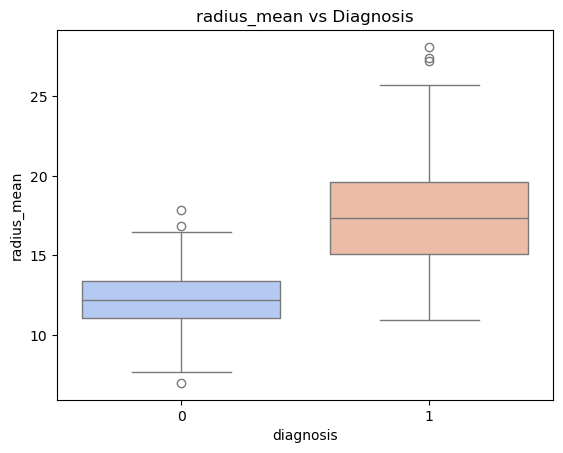

/tmp/ipykernel_21149/3811593567.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




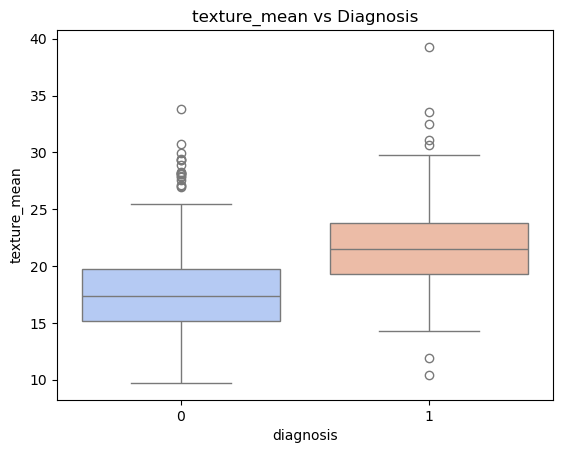

/tmp/ipykernel_21149/3811593567.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




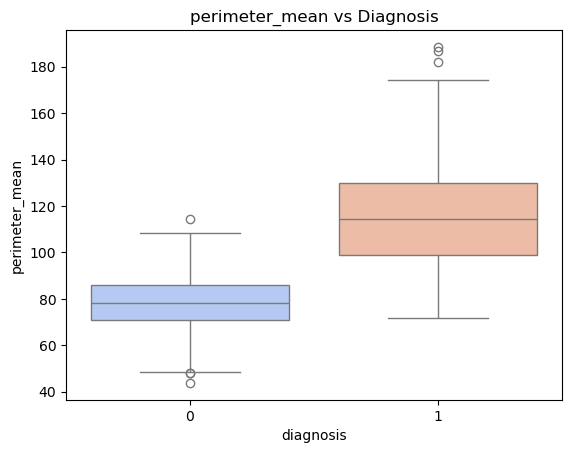

In [14]:
features_to_check = ['radius_mean', 'texture_mean', 'perimeter_mean']
for feature in features_to_check:
    sns.boxplot(data=df, x='diagnosis', y=feature, palette='coolwarm')
    plt.title(f'{feature} vs Diagnosis')
    plt.show()

# 4. Data Preprocessing

a. Feature Scaling
- Normalize the feature set.

In [16]:
X = df.drop(['diagnosis'], axis=1)
y = df['diagnosis']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

b. Apply PCA for dimensionality reduction

In [17]:
pca = PCA(n_components=10)
X_pca = pca.fit_transform(X_scaled)

c. Train-Test Split
- Split the dataset into training and testing sets.

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# 5. Model Building
a. Choose Algorithms
- Using algorithms Random Forest.

In [19]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
y_pred = rf_model.predict(X_test)

# 6. Model Evaluation
Evaluate the model's performance using metrics like accuracy, confusion matrix, and classification report.

Accuracy: 0.9707602339181286


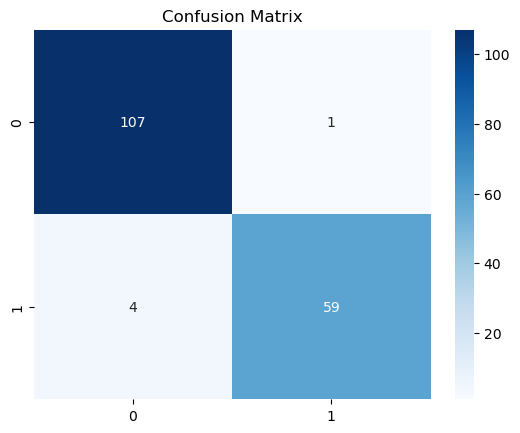

In [20]:
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

Classification Report

In [21]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98       108
           1       0.98      0.94      0.96        63

    accuracy                           0.97       171
   macro avg       0.97      0.96      0.97       171
weighted avg       0.97      0.97      0.97       171



ROC Curve

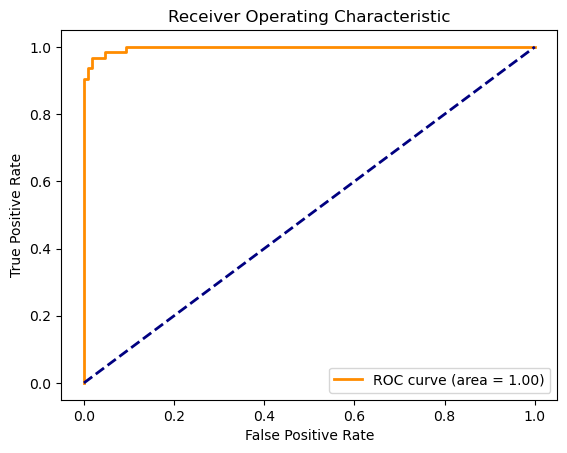

In [22]:
y_pred_prob = rf_model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# 7. Feature Importance
Analyze which features are most important for the model's decisions.

In [24]:
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values('Importance', ascending=False)

fig = px.bar(feature_importances, x='Feature', y='Importance', 
             title="Feature Importance", 
             color='Importance', 
             color_continuous_scale='Blues')
fig.show()

# 8. Cross-Validation
Validate the model using techniques like k-fold cross-validation for robustness.

In [23]:
cv_scores = cross_val_score(rf_model, X_pca, y, cv=5)
print(f'Cross-Validation Accuracy: {np.mean(cv_scores):.2f}')

Cross-Validation Accuracy: 0.95


# 9. Saving the Trained Model
Use joblib to save the trained model.

In [25]:
import joblib

# Save the trained Random Forest model
joblib.dump(rf_model, 'breast_cancer_model.pkl')
print("Model saved as 'breast_cancer_model.pkl'")

Model saved as 'breast_cancer_model.pkl'


# 10. Making Predictions with the Trained Model

In [29]:

# Load the trained model
rf_model = joblib.load('breast_cancer_model.pkl')

# Example input data
input_data = (15.34,14.26,102.5,704.4,0.1073,0.2135,0.2077,0.09756,0.2521,0.07032,0.4388,0.7096,3.384,44.91,0.006789,0.05328,0.06446,0.02252,0.03672,0.004394,18.07,19.08,125.1,980.9,0.139,0.5954,0.6305,0.2393,0.4667,0.09946)

# Convert input to numpy array
input_data_as_numpy_array = np.array(input_data).reshape(1, -1)

# Ensure the scaler is the same one used during training
input_data_scaled = scaler.transform(input_data_as_numpy_array)

# Make prediction
prediction = rf_model.predict(input_data_scaled)

print(prediction)

if prediction[0] == 1:
    print("Malignant")
else:
    print("Benign")

[1]
Malignant


/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

